In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

sns.set_style('whitegrid')

In [55]:
df = pd.read_csv('netflix_titles.csv')

In [56]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [57]:
df['date_added'].isnull().sum()

11

In [58]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

## Limpeza e Transformação dos Dados Faltantes

In [59]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['date_added'][0]

Timestamp('2019-09-09 00:00:00')

<h4> Percebemos que a coluna rating está com a classificação da faixa etária de diferentes países. </h4>
<h4> Então procuramos e achamos esse site do prime video: <a href='https://www.primevideo.com/help/ref=atv_hp_nd_cnt?language=pt_BR&nodeId=GFGQU3WYEG6FSJFJ'> Prime Video Faixa Etária</a> e mudamos para a classificação do Brasil para ficar mais fácil de entender.</h4>

In [60]:
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [61]:
dic = {'TV-PG': '7+' , 'TV-Y7': '7+' , 'TV-Y7-FV': '7+' , 'TV-MA': '18+' , 'TV-14': '16+' , 'R':'18+','TV-Y':'Todos','NR':'18+'
       ,'PG-13':'13+','TV-G':'Todos','PG':'7+','G':'Todos','NC-17':'18+' ,'UR':'Não Classificado'}

In [62]:
df['rating'] = df['rating'].map(dic)

<h4> Para a coluna 'director', os valores faltantes NaN, trocamos por 'Sem Diretor', sem ter que precisar dar um dropna(Excluir as intâncias com valores faltantes(NaN ou None)) , pois algumas instâncias possuiam os outros dados menos o diretor e com isso, poderiamos excluir instâncias reais.</h4>

In [63]:
diretor = {'director': 'Sem Diretor'}
df = df.fillna(value=diretor)

In [64]:
df = df.dropna()

<h4> Dropamos a coluna 'show_id' pois já temos os títulos. </h4>

In [65]:
df = df.drop(columns=['show_id'])

<h4> Separamos o data frame original em um data frame para os filmes e outro para as séries.</h4>

In [66]:
df_filmes = df[df['type'] == 'Movie']
df_tvshow = df[df['type'] == 'TV Show']

In [67]:
df_filmes['duration'][0]

'90 min'

In [68]:
df_filmes['duration'].unique()

array(['90 min', '94 min', '99 min', '110 min', '60 min', '95 min',
       '135 min', '98 min', '96 min', '113 min', '80 min', '112 min',
       '106 min', '102 min', '114 min', '125 min', '133 min', '86 min',
       '146 min', '79 min', '122 min', '126 min', '116 min', '130 min',
       '70 min', '128 min', '88 min', '108 min', '93 min', '64 min',
       '107 min', '111 min', '103 min', '72 min', '89 min', '127 min',
       '163 min', '104 min', '75 min', '82 min', '97 min', '91 min',
       '58 min', '152 min', '87 min', '78 min', '121 min', '101 min',
       '119 min', '83 min', '182 min', '124 min', '63 min', '24 min',
       '139 min', '171 min', '84 min', '62 min', '76 min', '92 min',
       '153 min', '141 min', '117 min', '100 min', '137 min', '132 min',
       '157 min', '109 min', '65 min', '105 min', '71 min', '123 min',
       '67 min', '140 min', '138 min', '149 min', '47 min', '148 min',
       '151 min', '155 min', '162 min', '85 min', '160 min', '29 min',
       '57 min

<h4> Aqui nós pegamos o data frame que possui apenas os filmes e assim transformamos as strings em números inteiros, fizemos isso pois a coluna duration das séries está em Seasons (Temporadas) e assim não temos um tempo certo.</h4>

In [69]:
df_filmes['duration'] = df_filmes['duration'].apply(lambda x: int(x.split(' ')[0]))

c:\users\ddayv\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df_filmes['duration'].unique()

array([ 90,  94,  99, 110,  60,  95, 135,  98,  96, 113,  80, 112, 106,
       102, 114, 125, 133,  86, 146,  79, 122, 126, 116, 130,  70, 128,
        88, 108,  93,  64, 107, 111, 103,  72,  89, 127, 163, 104,  75,
        82,  97,  91,  58, 152,  87,  78, 121, 101, 119,  83, 182, 124,
        63,  24, 139, 171,  84,  62,  76,  92, 153, 141, 117, 100, 137,
       132, 157, 109,  65, 105,  71, 123,  67, 140, 138, 149,  47, 148,
       151, 155, 162,  85, 160,  29,  57,  46,  73,  74,  25, 118,  66,
        20,  81,  77, 115, 168,  68,  52, 144, 161,  56,  51, 205, 131,
        59, 150, 159, 145, 158, 143,  45, 147, 129, 154,  61, 142, 214,
       136, 134,  44, 156,  23,  30, 120, 209,  28, 166,  69,  40,  54,
       200, 185,  53, 165, 164, 177,  18,  42,  41, 170, 187, 173,  12,
       176,  15,  55,  32,  14,  26,  48,  22,  49, 189, 201, 179, 191,
       193, 192,  43,  50,  38, 172, 224,  27, 178, 228, 312, 174, 169,
        31, 180, 196, 167,  33, 203, 195], dtype=int64)

### 3 Perguntas

<h4> Qual diretor ou diretores dirigiram mais filmes?</h4>

In [71]:
df_filmes['director'].value_counts().index[1]

'Raúl Campos, Jan Suter'

<h4> Qual faixa etária possui mais filmes?</h4>

In [72]:
df_filmes['rating'].value_counts()

18+                 1860
16+                  891
7+                   596
13+                  278
Todos                118
Não Classificado       7
Name: rating, dtype: int64

<h4> Quais filmes com categoria 'Não Classificados' existem? </h4>

In [73]:
indices = [df_filmes[df_filmes['rating'] == 'Não Classificado'].index[i]  for i in range(len(df_filmes[df_filmes['rating'] == 'Não Classificado']))]
df_filmes['title'].loc[indices]

332     You Don't Mess with the Zohan
799                   Good Luck Chuck
1754          Shootout at Lokhandwala
2461                    Immoral Tales
3029                         Sex Doll
3441                         Aquarius
4436                       White Girl
Name: title, dtype: object

### Centralidade e dispersão

In [74]:
print(df['release_year'].mean())   #Média
print(df['release_year'].std())    #Desvio padrão
print(df['release_year'].median()) #Mediana
print(df['release_year'].var())    #Variância
print(df['release_year'].mode())   #Moda

2013.005707762557
8.787325757100028
2016.0
77.21709396139359
0    2018
dtype: int64


In [75]:
print(df['rating'].value_counts().mean())   #Média
print(df['rating'].value_counts().std())    #Desvio Padrão
print(df['rating'].value_counts().median()) #Mediana
print(df['rating'].value_counts().var())    #Variância
print(df['rating'].mode())                  #Moda

876.0
914.1748191675375
600.0
835715.6
0    18+
dtype: object


### Boxplots

<AxesSubplot:>

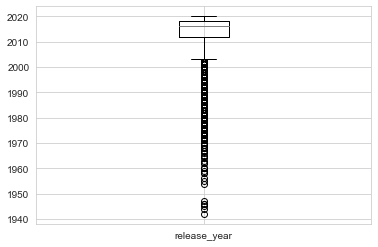

In [76]:
df.boxplot(column=['release_year'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1dee05b0d48>,
 'caps': [<matplotlib.lines.Line2D at 0x1dee05c9e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dee05c4a88>],
 'medians': [<matplotlib.lines.Line2D at 0x1dee05c9d88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dee05cfb48>],
 'means': []}

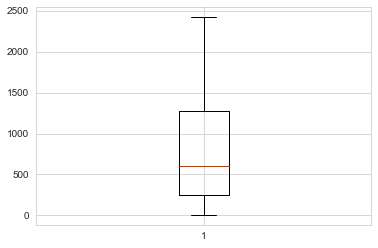

In [77]:
plt.boxplot(df['rating'].value_counts())

### Boxplot da coluna 'duration' do data frame que possui apenas os filmes

<AxesSubplot:>

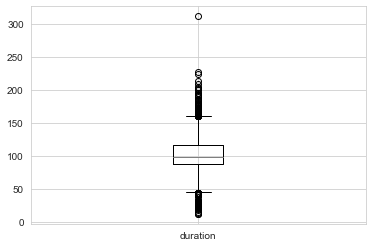

In [78]:
df_filmes.boxplot(column=['duration'])

## Visualização de dados

### Gráfico de Distribuição

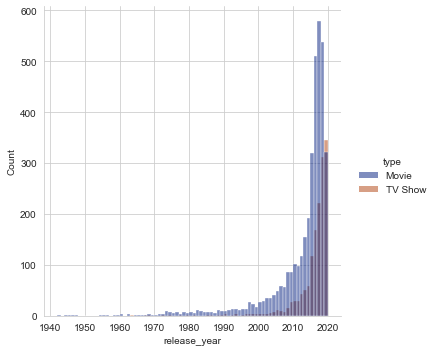

In [204]:
sns.set_palette('dark')
sns.displot(data=df , x='release_year' , binwidth=1 , hue='type')

### Gráfico de Barras

<AxesSubplot:xlabel='rating', ylabel='count'>

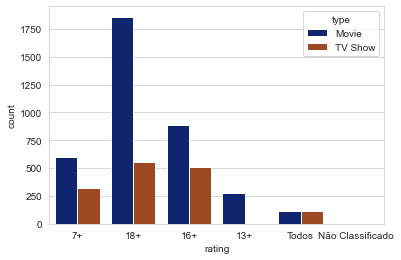

In [80]:
sns.countplot(data=df, x='rating' , hue='type')

### Gráfico de Linha Para os Filmes

<AxesSubplot:xlabel='release_year', ylabel='duration'>

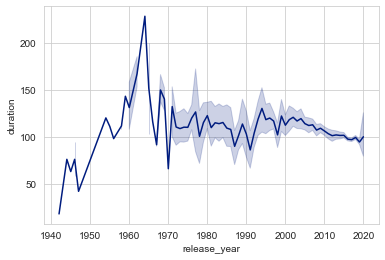

In [81]:
sns.lineplot(data=df_filmes, x='release_year' , y='duration')

### Gráfico da Correlação Para os Filmes

<AxesSubplot:>

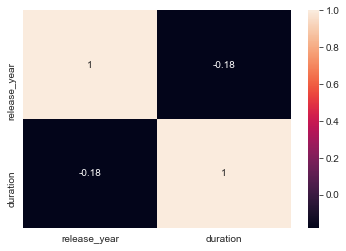

In [82]:
sns.heatmap(df_filmes.corr(), annot=True)

### Gráfico de Dispersão Para os Filmes

<AxesSubplot:xlabel='release_year', ylabel='duration'>

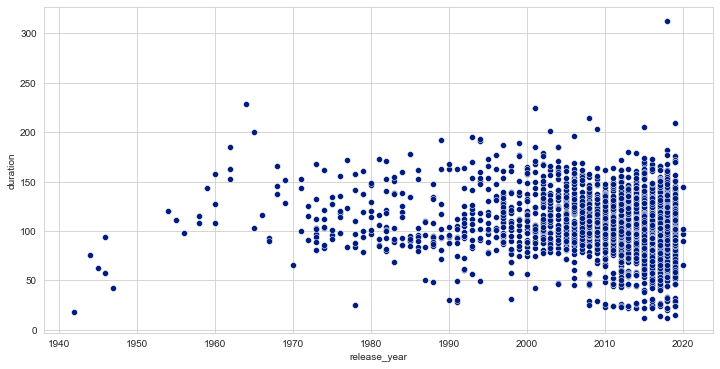

In [173]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filmes , x='release_year' , y='duration')

## Gráfico de barras

<AxesSubplot:xlabel='type', ylabel='count'>

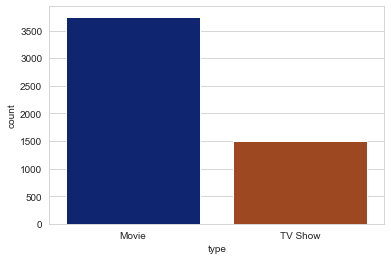

In [89]:
sns.countplot(data=df, x='type')

## KMeans

In [193]:
kmeans = KMeans(n_clusters=3)
x = np.array(df_filmes['duration']).reshape(-1,1)

In [194]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [195]:
np.unique(kmeans.labels_)

array([0, 1, 2])

## Visualização Dos Agrupamentos

<AxesSubplot:xlabel='release_year', ylabel='duration'>

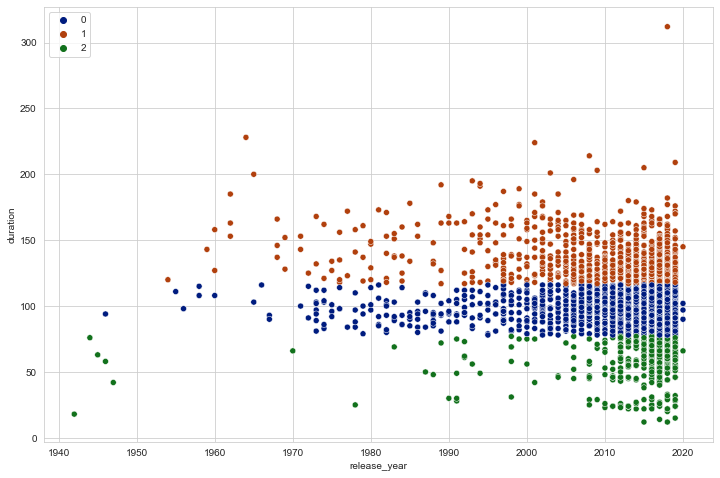

In [196]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_filmes , x='release_year' , y='duration' , hue=kmeans.labels_, palette='dark')

### Temos abaixo a duração média dos filmes

In [197]:
df_filmes['duration'].mean()

101.9112

### Temos abaixo o tamanho de cada agrupamento

In [198]:
print(df_filmes[kmeans.labels_ == 0]['duration'].value_counts().sum())
print(df_filmes[kmeans.labels_ == 1]['duration'].value_counts().sum())
print(df_filmes[kmeans.labels_ == 2]['duration'].value_counts().sum())

2290
963
497


### Com os dados acima e o gráfico, dá para perceber que o maior agrupamento é o de número 0(o grupo do meio), então temos uma maior quantidade de filmes que estão próximos da duração média e poucos filmes que são muito longos ou muito curtos.